
# MTHM008 Project 1 

700024338

## Introduction
This project investigates two systems of ordainary differential equations (ODE) (Lotka-Volterra predator-prey model and Lorenz's 1963 system). Exact solutions of dynamical ODE's are dificult to solve, however, by using mathematical models, we can easily alter parameters and conditions in order to visualise the behaviour of such systems and understand the implications of numerical solutions.

The first system looks at the popular predator-prey model. In the early 1900's, Lokta and Volterra independently considered the simplified two species interaction and concluded the populations would theoretically oscillate[].  The system ignores aspects such as disease or competition so each species would control the population of the other in a cyclical manner. From approximately 50 years of detailed records of pelt by the Hudson’s Bay Company, the abundance of snowshoe hares and Canadian lynx showed nearly periodic oscillation. With the assumption that wild numbers were proportional to trapped amounts, here we use the Lokta-Volterra equations to mathematically model this data and conduct numerical analysis to examine the systems stability.

The Lorenz model is a simplified mathematical model for atmospheric convection and consists of three ordinary differential equations which are known as Lorenz equations. The equations were originally derived from a minimalist model of thermal convection in a box by Saltzman (1962)[] and they have further applications in studies such as modelling lasers [] and dynamos []. The Lorenz  1963 paper [] proposed to rediscover the sensitive dependence of solutions on initial conditions (later known as chaos) [] . Solutions of these ODE’s are shown by trajectories in phase space and exhibit a distinct ‘strange attractor’ pattern. The strangeness can be explained by the uniqueness theorem which means the trajectories never cross and hence create an ‘infinite complex of surfaces’ []. Setting up perturbed simulations where initial conditions vary by small amounts, the trajectories start very close together then rapidly diverge with very different future states. The implication of this is that long term prediction becomes impossible in such a system. The predictability limit is hence bounded to the instability of the atmosphere which provides an upper bound and the skill to which current operational forecasting procedures are observed creates a lower bound []. Here we will use Forward Euler and Runge-Kutta (RK4) numerical methods as well as a built in scipy integration function solve_ivp to obtain solutions for the model. We will first discuss the sensitivity of the model to initial conditions and model parameters then assess the predictability of the system using Bred Vectors. Finally, we will use the Lorenz coupled equations to model the El Niño Southern Oscillation to discuss its real world applicability. 

## - Lotka-Volterra Model

- **Analyse the stability of equilibrium points**
- **Discretise the model using a finite difference method**
- **Investigate the behaviour of the model when a third species is introduced**

###  2 Species Model

We first limit our predator-prey model to a simple case with 2 species whose populations are represented by only their individual growth/decay and their mutual interaction. The time-dependent growth of the two species are described by the system of ODE's:

\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L \; ,
\end{align*}
where $H$ and $L$ represent the number of hare and lynx respectively, and $\alpha$, $\beta$, $\gamma$ and $\delta$ are positive real parameters.

Definition of parameters:

 -  $\alpha$ : Growth rate of prey in absence of predators,
 - $\beta$ : Effect of predatation on prey,
 -  $\delta$ : Natural death rate of predator in the absence of prey,
 -  $\gamma$ : Efficiency and propogation rate of predator in the presence of prey,
 


Having defined our equation and discussed the assumptions of the model, we will now work out the equilibrium points of this system to investigate whether one or both species can die out if they are both non-zero at some time t.

### Finding Equilibrium Points and Analysing System's Stability 
Equilibrium points are steady states that are a constant solution to an ODE. We will find $P_{0}$ and determine whether the eqilibrium point is stable by finding eigenvalues of the Jacobian Matrix. 
 - Finding Equilibrium points\
 \
Let's set our system of ODE as:
\
\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L\ &= F(H,L) \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= \delta H L - \gamma L\ &= G(H,L) \; ,
\end{align*}
\
From this, an equilibrium point is a point $P_{0}$ $=$ ($H_{0}$ ,$L_{0}$) for which:\
\
\begin{align*}
F (H_{0} ,L_{0}) = 0\;,\\
G (H_{0} ,L_{0}) = 0\;,
\end{align*}
\
An explicit solution is $P_{0,1}$ $=$ $(0,0)$\
Rearranging $F $ and $G$, we can find our second solution by making the values within the brackets $=0$:
\
\begin{align*}
H(\alpha - \beta L) = 0 \rightarrow \alpha - \beta L = 0\;,\\
L(\delta H - \gamma) = 0 \rightarrow \delta H - \gamma = 0 \;,
\end{align*}
\
Hence, $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ is also a solution.

 - Test the local stability at each fixed point\
 \
The system's stability is interpreted by linearising the non-linear system near an equilibrium. This perturbation will allow us to understand the behaviour of the system local to these points such as if it were to move away or remain at a steady state.\
\
We set our perturbed points to be: H(t) = $H_{0}$ + $\theta$ and L(t) = $L_{0}$ + $\phi$, where $\theta$ and $\phi$ are small perturbations from a fixed point. Linearising F and G about these points usinf Taylor expansion, we have:\
\
\begin{align*}
\frac{\partial \theta}{\partial t} &= F(H_{0} + \theta,L_{0} + \phi) ,\\
&= F(H_{0} ,L_{0}) + \theta \displaystyle \Bigg[ \frac{\partial F}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial F}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ... \; ,\\
&= \theta \displaystyle \Bigg[ \frac{\partial F}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial F}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ...
\\
\\
\frac{\partial \phi}{\partial t} &= G(H_{0} + \theta,L_{0} + \phi),\\
&= G(H_{0} ,L_{0}) + \theta \displaystyle \Bigg[ \frac{\partial G}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial G}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ... \; ,\\
&= \theta \displaystyle \Bigg[ \frac{\partial G}{\partial H}\Bigg]_{(H_{0} ,L_{0})} + \phi \displaystyle \Bigg[ \frac{\partial G}{\partial L}\Bigg]_{(H_{0} ,L_{0})} + ...\\
\\
\end{align*}
\
Higher-order terms in the taylor series for perturbations, $\theta$ & $\phi$ that are close to 0, can be neglected. This system of perturbation ODE can be written as a Jacobian Matrix, $\boldsymbol A$ :\
\
\begin{align*}
\boldsymbol{u} &= \begin{bmatrix} \theta \\ \phi \end{bmatrix} \; ,\\
\\
\frac{\partial \boldsymbol{u}}{\partial t} &= \begin{bmatrix} \displaystyle \Bigg( \frac{\partial F}{\partial H}\Bigg)_{(H_{0} ,L_{0})}& \displaystyle \Bigg( \frac{\partial F}{\partial L}\Bigg)_{(H_{0} ,L_{0})} \\ \displaystyle \Bigg( \frac{\partial G}{\partial H}\Bigg)_{(H_{0} ,L_{0})}&\displaystyle \Bigg( \frac{\partial G}{\partial L}\Bigg)_{(H_{0} ,L_{0})} \end{bmatrix} \cdot \boldsymbol{u} \; ,\\
&= \boldsymbol {A} \boldsymbol{u}\\
\\
\end{align*}
\
Hence, by finding the partial derivatives of functions $F(H,L)$ and $G(H,L)$ , we have:\
\
\begin{align*}
\boldsymbol {A} &= \begin{bmatrix} \alpha - \beta L & - \beta H \\ \delta L & \delta H - \gamma \end{bmatrix}
\end{align*} \
From the eigenvalue equation , $\boldsymbol{A}$ $\boldsymbol{x}$ = $\lambda$ $\boldsymbol{x}$ , eigenvalues ,$\lambda$ , are found to be the roots of the polynomial that forms when evaluating the characteristic equation at $P_{0,1}$ & $P_{0,2}$ which is:\
\
\begin{align*}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = 0 ,  \quad \boldsymbol{I}=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\end{align*} 
    - at $P_{0,1}$ $=(0,0)$:\
\begin{align}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = det \begin{bmatrix} \alpha - \lambda & 0 \\ 0 & - \gamma - \lambda \end{bmatrix} 
&= (\alpha - \lambda) \cdot (- \gamma - \lambda ) = 0 ,\\
\end{align}
\
Eigenvalues $\rightarrow  \lambda_{1} = \alpha , \lambda_{2} = - \gamma$ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{R}$\
$\lambda_{1} > 0 , \lambda_{2} < 0 $ \
\
The eigenvalues are real and of opposite signs which result into an **unstable** saddle point
    - at $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$:\
\begin{align}
det[\boldsymbol{A} - \lambda \boldsymbol{I}] = det \begin{bmatrix} 0 - \lambda & - \frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 - \lambda \end{bmatrix}
= (- \lambda) \cdot ( - \lambda ) - (- \frac{\beta \gamma}{\delta}) \cdot (\frac{\delta \alpha}{\beta}) ,
&= \lambda^{2} + \gamma \alpha  =0
\end{align}  
\
Eigenvalues $\rightarrow  \lambda_{1} = \sqrt{\gamma \alpha}$ $\boldsymbol{i}$ , $\lambda_{2} = - \sqrt{\gamma \alpha}$ $\boldsymbol{i} $ \
\
$\lambda_{1} , \lambda_{2} \; \epsilon \; \mathbb{C}$\
$\lambda_{1}$ & $\lambda_{2}$ are complex conjugates \
\
The eigenvalues are complex conjugates with no real values which result into an **stable** cyclical oscillation.

We will now integrate the ODE by discretising the model in order find solutions and confirm the stability of the model at each equilibrium point.

### Discretising the Model

Another method to find an approximate solution for a system of differntial equations is by using a finite difference method, more specifically the Forward Euler method.

Given an ODE of the form 

\begin{equation}
\frac{d{\bf{y}}}{dt} = {\bf{f}}({\bf{y}}), \quad t\ge t_0, \quad {\bf{y}}(t_0)={\bf{y}}_0
\end{equation}

The domain is first discretised into a finite number of points that are evenly distributed: $t_1, t_2, ..., t_n$.

Integrating the ODE between $t_i$ and $t_{i+1}$ gives
\begin{align}
{\bf{y}}(t_{i+1}) &= {\bf{y}}(t_i) + \int_{t_i}^{t_{i+1}}{\bf{f}}({\bf{y}}(\tau)) d\tau \\
&\approx {\bf{y}}(t_i) + (t_{i+1}-t_i){\bf{f}}({\bf{y}}_i) \\
&= {\bf{y}}(t_i) + \Delta t{\bf{f}}({\bf{y}}_i)
\end{align}
where $\Delta t$ is the (constant) distance between $t_i$ and $t_{i+1}$.

This solution approximates the model to be piecewise linear so it is clear that the smaller the domain is discretised the closer our approximation will be to the true analytical solution.

We will now formulate a recursive algorithm that is applied to the Lokta-Volterra model.  The method for this will be to:

1. initialise H, L, the model parameters $\alpha$, $\beta$, $\gamma$ and $\delta$, the start time $t_0$, the timestep $\Delta t$ and an end time $t_{max}$

2. write a loop to update the values according to:
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}

3. plot the data

Text(0.5, 1.0, 'Phase Diagram')

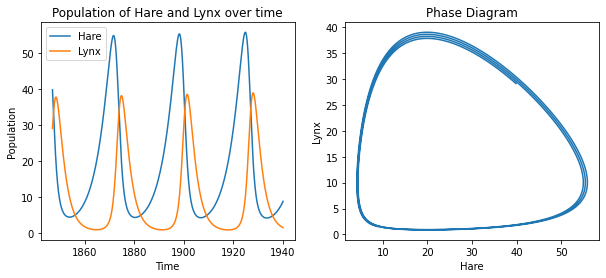

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from cw1_functions import *
'''
forward_euler2 function returns np.array of (hare, lynx, time) data and can be called 
as x[0], x[1], x[2] repectively when x=forward_euler(...).

    Parameters for the model - a,b,d,g are aplha, beta, delta, gamma respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
'''
#Set model parameters, timestep, run-time and initial population of both species 
x1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
hare1 = x1[0]
lynx1 = x1[1]
time1 = x1[2]

#Plotting the time evolution of hare and lynx populations using forward Euler method.
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes2[0].plot(x1[2], x1[0], label ='Hare')
axes2[0].plot(x1[2], x1[1], label = 'Lynx')
axes2[1].plot(x1[0], x1[1])
axes2[0].set_xlabel('Time')
axes2[0].set_ylabel('Population')
axes2[1].set_xlabel('Hare')
axes2[1].set_ylabel('Lynx')
axes2[0].legend()
axes2[0].set_title('Population of Hare and Lynx over time')
axes2[1].set_title('Phase Diagram')


Periodic behavior similar to that observed in records of pelt by the Hudson’s Bay Company are found in the phase diagram on the right and species' population evolution on the left by using the Forward Euler numerical method. Growth in Hare population increases the efficiency and propogation in prey which in turn reduces the Hare population. The decline in hare population is followed by a fall in Lynx abundance as their food source becomes more scarce which ultimately allows for increased propogation of Hare. This numerical method is showing behaviour of a slight overal growth trajectory within both species' population rather than a complete cyclical relationship. How accurate is this method of integration and should we use another method to correct this? 

***Varying Time steps***

Timesteps determine the extent of discretisation. Forward Euler method approximates a continuous integration into discrete terms from a Taylor expansion therefore, varying the timestep should affect the accuracy of the approximation.

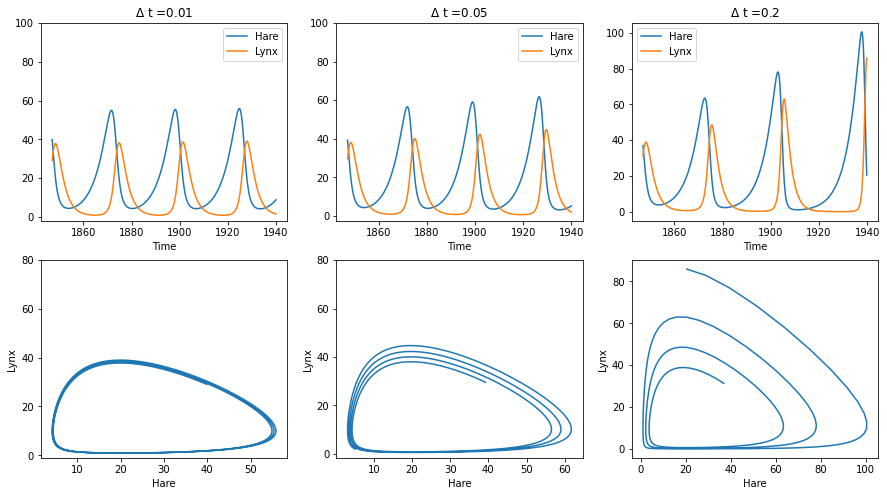

In [32]:
fig1, axes1 = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # defining the figure and subplots
cols1=[0.01,0.05,0.2]
for i, ax in zip(cols1, axes1[0]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=i,Hi=40,Li=29)
    ax.plot(a[2],a[0], label = 'Hare')
    ax.plot(a[2],a[1], label = 'Lynx')
    ax.set_yticks(np.arange(0,120,20))
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
    ax.set_title('$\Delta$ t ='+ str(i) )
for i, ax in zip(cols1, axes1[1]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=i,Hi=40,Li=29)
    ax.plot(a[0],a[1])
    ax.set_yticks(np.arange(0,100,20))
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    
    

The top three plots show the time evolution of the population of Hare and Lynx and the bottom three are phase plots of the respective evolution shown. $\Delta t$ are chosen to be 0.01, 0.05 and 0.2.
These plots show the Forward Euler method to be sensitive to the timesteps we choose. Increasing the timesteps lead to a gradual population increase for both species moving further away from periodic behaviour. Keeping the timesteps relatively small (e.g. 0.01 years) in the the Forward Euler method approximates the Lokta-Voltera equations far better than for larger timesteps. We expect this to be the case as the more we discretise the model, the closer our solution will be to the continuous form. Making it extremely small will be a large computational cost so $\Delta t$ = 0.01 looks to be sufficient to appropriately show cyclical behaviour in the run time we have chosen.

Having chosen  $\Delta t$ , lets look at the effects of varying model parameters.

***Varying Model Parameters***

Here we plot the phase diagrams of varying parameters $\alpha , \beta, \delta, \gamma$ and discuss their physical meaning.

In [13]:
#varying alpha
a1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
a2=forward_euler2(a=0.4,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
a3=forward_euler2(a=0.6,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#varying beta
b1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
b2=forward_euler2(a=0.2,b=0.04,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
b3=forward_euler2(a=0.2,b=0.08,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#varying delta
d1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
d2=forward_euler2(a=0.2,b=0.02,d=0.04,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
d3=forward_euler2(a=0.2,b=0.02,d=0.06,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#varying gamma
g1=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
g2=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.6,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
g3=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.8,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

#storing data in a list 
v_a=[a1,a2,a3]
v_b=[b1,b2,b3]
v_d=[d1,d2,d3]
v_g=[g1,g2,g3]

#setting labels for the legend
l_a=[r'$\alpha$ =0.1',r'$\alpha$=0.2',r'$\alpha$=0.4']
l_b=[r'$\beta$=0.02',r'$\beta$=0.04',r'$\beta$=0.08']
l_d=[r'$\delta$=0.02',r'$\delta$=0.04',r'$\delta$=0.06']
l_g=[r'$\gamma$=0.4',r'$\gamma$=0.6',r'$\gamma$=0.8']


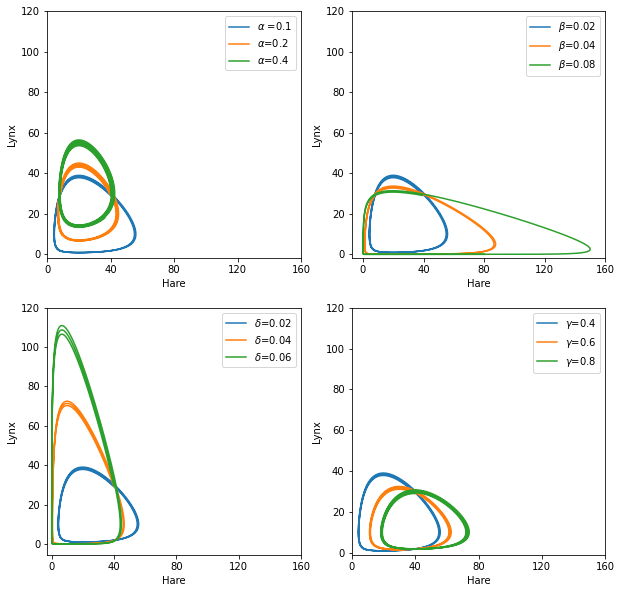

In [23]:
fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
cols1 = [v_a,v_b,v_d,v_g]
labels = [l_a,l_b,l_d,l_g]
for col, ax, l in zip(cols1, axes1,labels):
    ax.plot(col[0][0],col[0][1], label = l[0])
    ax.plot(col[1][0],col[1][1], label = l[1])
    ax.plot(col[2][0],col[2][1], label = l[2])
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    ax.set_xticks(range(0,180,40))
    ax.set_yticks(range(0,140,20))
    ax.legend()


These figures show phase plots of Hare and Lynx populations when model parameters are changed independently. For example, the top left subfigure shows phase plots where $\alpha$ varies but all other parmeters remain the same. The blue line is also the same for all four plots and is used as a reference state to allow comparison between parameters. Varying any of the model parameters will change the non-zero equilibrium point for all the phase plots in each graph since $P_{0,2}$ = $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. 

Eigenvalue Analysis


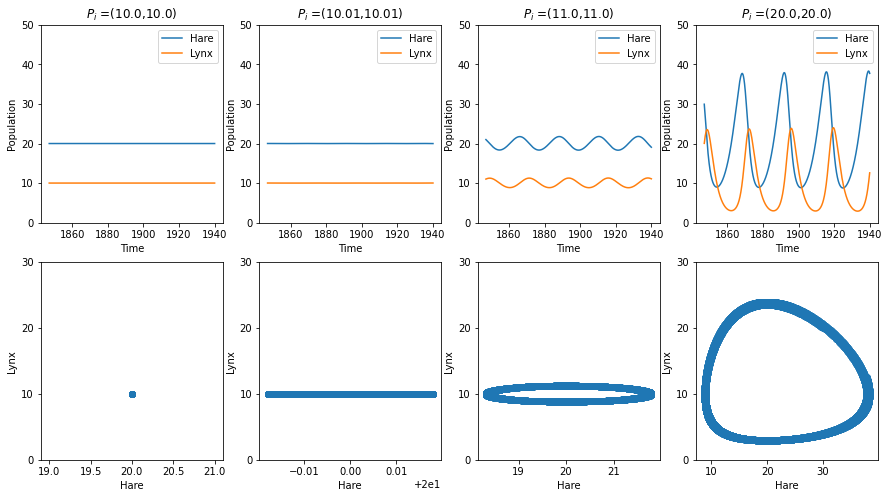

In [83]:
fig1, axes1 = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))  # defining the figure and subplots
cols1=[0.2/0.02,0.2/0.02+0.01,0.2/0.02+1,0.2/0.02+10]
cols2=[0.4/0.02,0.4/0.02+0.01,0.4/0.02+1,0.4/0.02+10]
for i,j,ax in zip(cols1, cols2, axes1[0]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=j,Li=i)
    ax.plot(a[2],a[0], label = 'Hare')
    ax.plot(a[2],a[1], label = 'Lynx')
    ax.set_yticks(np.arange(0,60,10))
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
    ax.set_title('$P_{i}$ ='+ '(' +str(i)+','+str(i) +')' )
for i,j, ax in zip(cols1, cols2, axes1[1]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=j,Li=i)
    ax.scatter(a[0],a[1])
    ax.set_yticks(np.arange(0,40,10))
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')



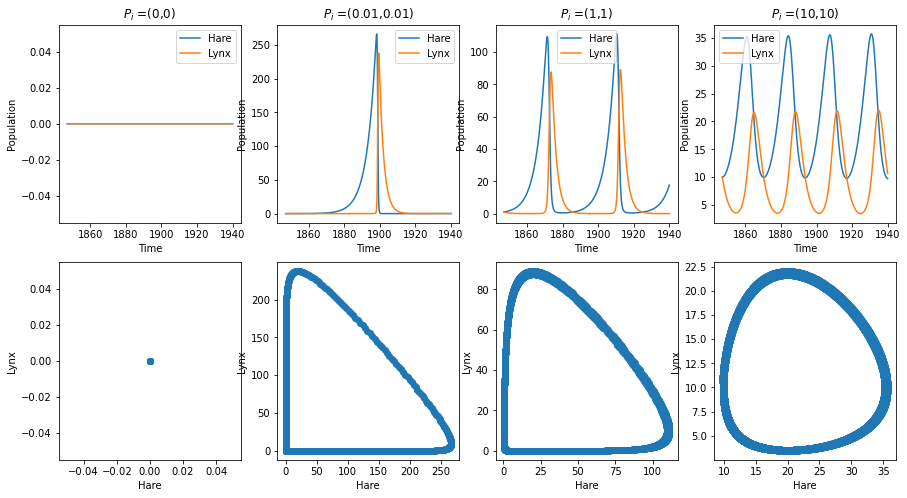

In [77]:
fig2, axes2 = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))  # defining the figure and subplots
cols2=[0,0.01,1,10]
for i, ax in zip(cols2, axes2[0]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=i,Li=i)
    ax.plot(a[2],a[0], label = 'Hare')
    ax.plot(a[2],a[1], label = 'Lynx')
    ax.set_xlabel('Time')
    ax.set_ylabel('Population')
    ax.legend()
    ax.set_title('$P_{i}$ ='+ '(' +str(i)+','+str(i) +')' )
for i, ax in zip(cols2, axes2[1]):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=i,Li=i)
    ax.scatter(a[0],a[1])
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')


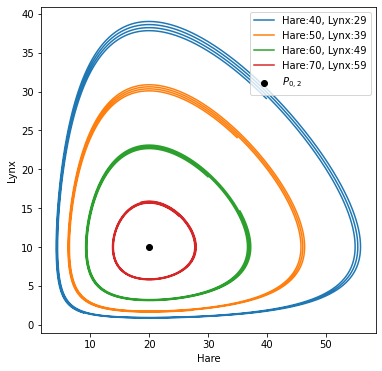

In [51]:
fig2, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.scatter(0.4/0.02,0.2/0.02 , label =r'$P_{0,2}$', color='black')
cols1=[40,35,30,25]
cols2=[29,24,19,14]
labels =['Hare:40, Lynx:29','Hare:50, Lynx:39','Hare:60, Lynx:49','Hare:70, Lynx:59']
for i,j, k in zip(cols2, cols1,labels):
    a=forward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=j,Li=i)
    ax.plot(a[0],a[1], label = k)
    ax.set_xlabel('Hare')
    ax.set_ylabel('Lynx')
    ax.legend()
    ax.set_title('')

All curves encircle the non-zero equilibrium point $P_{0,2}$ as only Hare and Lynx populations are changed. As initial populations of each species gets closer to equilibrium values, the radius of the curve decreases.

Modified Euler method

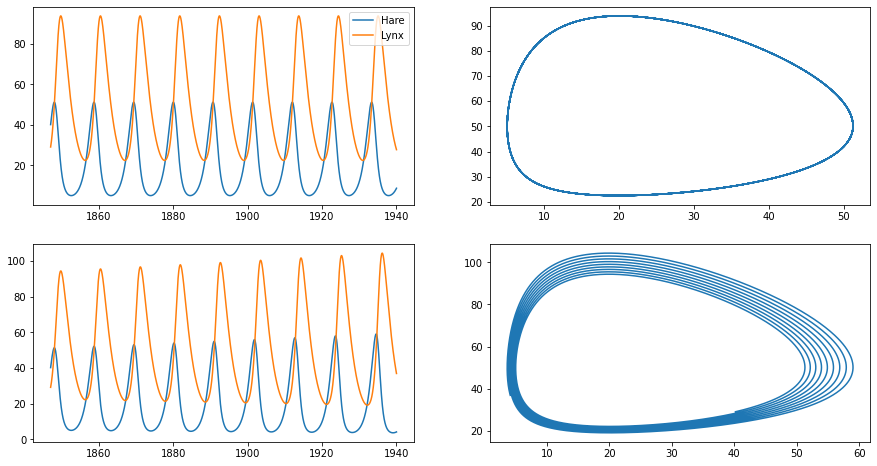

In [86]:
x1=modforward_euler2(a=1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
hare1 = x1[0]
lynx1 = x1[1]
time1 = x1[2]
x2=forward_euler2(a=1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
hare2 = x2[0]
lynx2 = x2[1]
time2 = x2[2]

#Plotting the time evolution of hare and lynx populations and phase diagrams.
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes2[0,0].plot(time1, hare1, label ='Hare')
axes2[0,0].plot(time1, lynx1, label ='Lynx')
axes2[0,1].plot(hare1, lynx1)
axes2[1,0].plot(time2, hare2)
axes2[1,0].plot(time2, lynx2)
axes2[1,1].plot(hare2, lynx2)
axes2[0,0].legend()

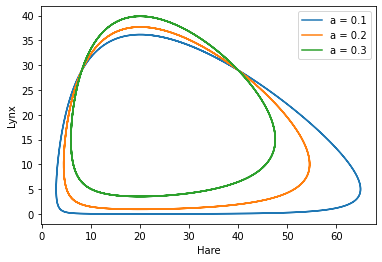

In [87]:
x1=modforward_euler2(a=0.1,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x2=modforward_euler2(a=0.2,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)
x3=modforward_euler2(a=0.3,b=0.02,d=0.02,g=0.4,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29)

plt.plot(x1[0],x1[1], label = 'a = 0.1')
plt.plot(x2[0],x2[1], label = 'a = 0.2')
plt.plot(x3[0],x3[1], label = 'a = 0.3')
plt.xlabel('Hare')
plt.ylabel('Lynx')
plt.legend()

###  3 Species Model
\begin{align*}
\frac{\mathrm{d} H}{\mathrm{d} t} &= \alpha H - \beta H L \; ,\\
\frac{\mathrm{d} L}{\mathrm{d} t} &= +\delta H L - \gamma L - \epsilon L W \; ,\\
\frac{\mathrm{d} W}{\mathrm{d} t} &= -\eta W + \rho L W \; ,
\end{align*}
where $H$, $L$ and $W$ represent the number of hare, lynx and wolf respectively, and $\alpha$, $\beta$, $\gamma$, $\delta$, $\epsilon$, $\eta$ and $\rho$ are positive real parameters.

Forward Euler
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_i L_i - \gamma L_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}


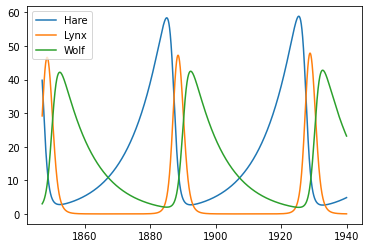

In [88]:
    
"""
Forward euler method for Lokta-Volterra Model 3 species
    Parameters for the model - a,b,d,g,ep,et,r are aplha, beta, delta, gamma, epsilon, eta, rho respectively.
    t : start time
    t_max: maximum runtime 
    Del_t: constant timestep
    Hi: initial hare population
    Li: initial lynx population
    Wi: initial wolf population
Returns an array of [hare, lynx, wolf, time]
"""
 
y=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

#Plotting the time evolution of hare and lynx populations using forward Euler method.

plt.plot(y[3], y[0], label ='Hare')
plt.plot(y[3], y[1], label ='Lynx')
plt.plot(y[3], y[2], label ='Wolf')
plt.legend()



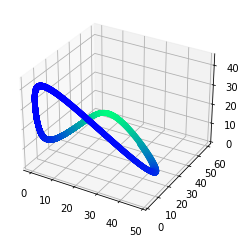

In [93]:
axes22 = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = y[2]
xline = y[1]
yline = y[0]
axes22.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = y[2]
xdata = y[1]
ydata = y[0]
axes22.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter');

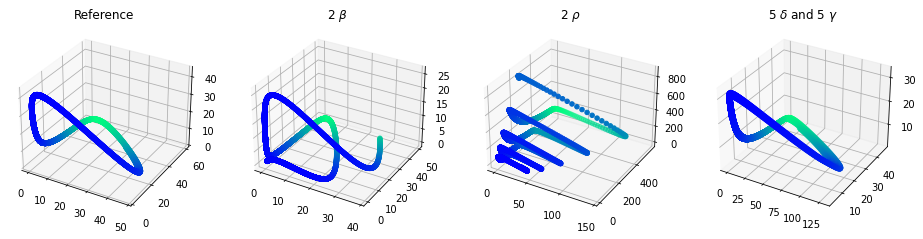

In [111]:
#reference
y1=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double beta
y2=forward_euler3(a=0.1,b=0.04,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#double rho
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.04,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )
#5 times increase of delta and gamma
y4=forward_euler3(a=0.1,b=0.02,d=0.1,g=0.5,ep=0.1,et=0.1,r=0.02,t=1847,t_max=1940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

col=[y1,y2,y3,y4]
loc=[1,2,3,4]
label=['Reference',r'2 $\beta$ ', r'2 $\rho$ ', r'5 $\delta$ and 5 $\gamma$ ']
fig = plt.figure(figsize=plt.figaspect(.25))
for i,j,k in zip(col,loc,label):
    ax1 = fig.add_subplot(1, 4, j,projection='3d')
    zdata = i[2]
    xdata = i[1]
    ydata = i[0]
    ax1.scatter3D(xdata, ydata, zdata, c=ydata, cmap='winter')
    ax1.set_title(k);



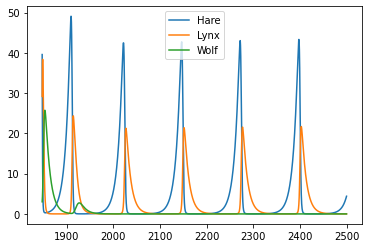

In [116]:
#longer time forecast of 2 \beta
y2=forward_euler3(a=0.1,b=0.04,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2500,Del_t=0.01,Hi=40,Li=29,Wi=3 )

plt.plot(y2[3], y2[0], label ='Hare')
plt.plot(y2[3], y2[1], label ='Lynx')
plt.plot(y2[3], y2[2], label ='Wolf')
plt.legend()

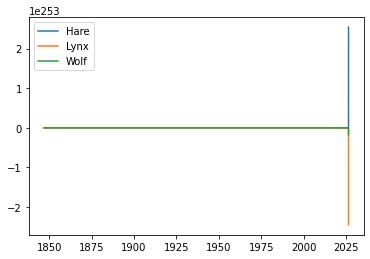

In [117]:
y3=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.04,t=1847,t_max=2500,Del_t=0.01,Hi=40,Li=29,Wi=3 )

plt.plot(y3[3], y3[0], label ='Hare')
plt.plot(y3[3], y3[1], label ='Lynx')
plt.plot(y3[3], y3[2], label ='Wolf')
plt.legend()

Modified Euler
\begin{align}
  H_{i+1} &= H_i + \Delta t (\alpha H_i - \beta H_i L_i) \\
  L_{i+1} &= L_i + \Delta t (\delta H_{i+1} L_i - \gamma L_i - \epsilon L_i W_i) \\
  W_{i+1} &= W_i + \Delta t (-\eta W_i + \rho L_{i+1} W_i) \\
  t_{i+1} &= t_i + \Delta t
\end{align}


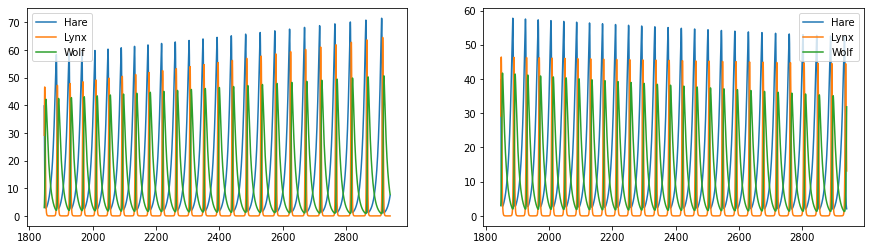

In [99]:
y1=forward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

y2=modforward_euler3(a=0.1,b=0.02,d=0.02,g=0.1,ep=0.02,et=0.1,r=0.02,t=1847,t_max=2940,Del_t=0.01,Hi=40,Li=29,Wi=3 )

fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))  # defining the figure and subplots
axes1 = axes1.ravel()  # array to 1D
three_mod_comp =[y1,y2] 
for col, ax in zip(three_mod_comp, axes1):
    ax.plot(col[3],col[0],label ='Hare')
    ax.plot(col[3],col[1],label ='Lynx')
    ax.plot(col[3],col[2],label ='Wolf')
    ax.legend()



## - Lorenz Model
- Finding solutions to the Lorenz model
- Sensitivity of model to initial conditions and model parameters
- Exploring predictability and growth rates
- Modelling ENSO

$$\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{z} \end{bmatrix} = \begin{bmatrix} \sigma (y - x) \\ -x z + r x - y \\ x y - b z \end{bmatrix} .$$
Here $x$, $y$ and $z$ are our coordinates in three-dimensional space, the dot represents the derivative with respect to time $t$, and $\sigma$, $r$ and $b$ are the parameters of the model. A typical choice for these parameters is $\sigma=10$, $r=28$ and $b=8/3$.


generate our approximate solution using the Forward Euler method via

\begin{equation}
X_{i+1} = X_i + \Delta t \,\text{lorenz}(X_i, t)
\end{equation}

In [ ]:
X0 = np.array([1, 1, 1])
t = 0
dt = 0.01
t_max = 50
Xi = X0

X= lorenz_fe(t=t,t_max=t_max,Xi=Xi,dt=dt)[0]
time= lorenz_fe(t=t,t_max=t_max,Xi=Xi,dt=dt)[1]

x, y, z = X.T
import matplotlib.pyplot as plt
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.title("The Lorenz attractor")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
# the (111) argument to add_subplot specifies the dimensions of the subplots
# the first number specifies the number of rows
# the second number specifies the number of columns
# the third number specifies the index of this particular plot, with 1 indicating the upper left plot
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("The Lorenz attractor")

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(16, 8))
# let's do some more subplots!
# these show the evolution of x, y and z with time
axs[0].plot(time, x)
axs[0].set_xlabel('time')
axs[0].set_ylabel('x')
axs[1].plot(time, y)
axs[1].set_xlabel('time')
axs[1].set_ylabel('y')
axs[2].plot(time, z)
axs[2].set_xlabel('time')
axs[2].set_ylabel('z')
# there are many ways to tweak matplotlib plot spacing but this is a nice way to persuade
# matplotlib to do it for you, if possible - try without this line!
fig.tight_layout()

simulate the time evolution for a range of input parameters and initial conditions. We will use the scipy integration function solve_ivp, which implements a range of more sophisticated timestepping algorithms.

In [1]:
from scipy.integrate import solve_ivp

In [ ]:
times = np.linspace(0, 50, 5001)  # this returns 5001 equispaced points 0, 0.01, ..., 50. (why not 5000?)
X0= [1,1,1]
#fun:Right-hand side of the system: the time derivative of the state X at time t.
#t_span2:Interval of integration (t0, tf). The solver starts with t=t0 and integrates until it reaches t=tf. 
#y0:Initial state.
#t_eval:Times at which to store the computed solution.

sol = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)

In [ ]:
x1, y1, z1 = sol.y
fig, axs = plt.subplots(2, 3, figsize=(16, 8))  # produces 6 plots arranged in 2 rows of 3
axs[0, 0].plot(time, x)
axs[0, 1].plot(time, y)
axs[0, 2].plot(time, z)
axs[1, 0].plot(times, x1)
axs[1, 1].plot(times, y1)
axs[1, 2].plot(times, z1)
axs[0, 0].set_title('x')
axs[0, 1].set_title('y')
axs[0, 2].set_title('z')
# this loops over all plots to set the xlabel
for ax in axs.flat:
    ax.set(xlabel='time')
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
axs[0].plot(x, z)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[1].plot(x1, z1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
fig.suptitle("The Lorenz attractor, starting from the same initial conditions, computed using two different algorithms.")
axs[0].set_title("Forward Euler")
axs[1].set_title("scipy.integrate.solve_ivp")

compare results using the scipy solve_ivp function with different initial conditions.

In [ ]:
X0 = np.array([0.95, 1., 1.])  # define a new initial condition
sol2 = solve_ivp(lorenz_equation, (0, 50), X0, t_eval=times)  # save the solution to new variable, sol2
x2, y2, z2 = sol2.y
plt.plot(times, x1, times, x2)
plt.xlabel('time')
plt.ylabel('x')
plt.title("Two trajectories for the Lorenz system")

In [2]:
separation = np.linalg.norm(sol2.y-sol.y, axis=0)

NameError: name 'np' is not defined

In [ ]:
plt.plot(times, separation)
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Separation over time between two trajectories in the Lorenz system")

In [ ]:
plt.plot(times[:1000], separation[:1000])
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Separation over time between two trajectories in the Lorenz system")

In [ ]:
plt.plot(times[:30], separation[:30])
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Separation over time between two trajectories in the Lorenz system")

In [ ]:
plt.plot(times[:30], np.log(separation[:30]))
plt.xlabel("Time")
plt.ylabel("Log separation")
plt.title("Log separation over time between two trajectories in the Lorenz system")

Using RK4 method calculate bred vectors to investigate predictability

In [ ]:
# Define parameters 

# Initial condition for control simulation:
X0 = np.array([1, 1, 1])

# Perturbation - initial condition for perturbed simulation is X0 + Xp:
Xp = np.array((1, 1, 1))/(np.sqrt(3))

# Start time, timestep, end time and n:
t = 0.
dt = 0.01
max_t = 100
n = 8

Xc=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[0]
Xper=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[1]
bred=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[2]
growth=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[3]
growth_time=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[4]
timesteps=BredVectors(X0=X0,Xp=Xp,t=t,dt=dt,max_t=max_t,n=n)[5]


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
#x, y, z = Xper.T
xc, yc, zc = Xc.T
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)
p = ax.scatter(xc, yc, zc ,c=growth)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
cbar = fig.colorbar(p, fraction =0.035)
cbar.set_label('Growth rate [$s^{-1}$]')
plt.title("The Lorenz attractor")


In [ ]:
x, y, z = Xper[0:10].T
xc, yc, zc = Xc[0:10].T
fig1, ax= plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
ax[0].plot(growth_time[0:10], x, label ='x perturbed')
ax[0].plot(growth_time[0:10], xc, label ='x contol')
ax[0].legend()
ax[1].plot(growth_time[0:10], y, label ='y perturbed')
ax[1].plot(growth_time[0:10], yc, label ='y control')
ax[1].legend()
ax[2].plot(growth_time[0:10], z, label ='z perturbed')
ax[2].plot(growth_time[0:10], zc, label ='z control')
ax[2].legend()